# Evaluating iOS Devices

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
cellphones = pd.read_csv('../input/phone-prices/cleaned_all_phones.csv')
cellphones.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


## Checking unique brands

In [3]:
cellphones['brand'].unique()

array(['Huawei', 'LG', 'Xiaomi', 'Sony', 'Oppo', 'Samsung', 'Lenovo',
       'Apple', 'Google', 'Honor', 'Realme', 'OnePlus', 'Vivo'],
      dtype=object)

## Getting separated dataframe with iDevices only

In [4]:
mask = (cellphones.brand == 'Apple')
apple_devices = cellphones[mask]

## Encoding String and boolean values to integer

In [5]:
apple_devices["phone_name"].unique()

array(['iPhone 8', 'iPhone X', 'iPhone XS Max', 'iPhone XS', 'iPhone XR',
       'iPhone 11 Pro Max', 'iPhone 11 Pro', 'iPhone 11',
       'iPhone SE (2020)', 'iPhone 12 Pro', 'iPhone 12',
       'iPhone 12 Pro Max', 'iPhone 12 mini', 'iPhone 13 Pro Max',
       'iPhone 13 mini', 'iPhone 13', 'iPhone 13 Pro', 'iPhone SE (2022)',
       'iPhone 14 Pro Max', 'iPhone 14 Pro', 'iPhone 14 Plus',
       'iPhone 14'], dtype=object)

In [6]:
treated_apple_devices = apple_devices.replace(apple_devices["phone_name"].unique(), [x for x in range(len(apple_devices["phone_name"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,iOS 11,4.7,750x1334,1821,Li-Ion,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,iOS 11.1.1,5.8,1125x2436,2716,Li-Ion,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,iOS 12,6.5,1242x2688,3174,Li-Ion,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,iOS 12,5.8,1125x2436,2658,Li-Ion,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,iOS 12,6.1,828x1792,2942,Li-Ion,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


In [7]:
apple_devices["os"].unique()

array(['iOS 11', 'iOS 11.1.1', 'iOS 12', 'iOS 13', 'iOS 14.1', 'iOS 15',
       'iOS 15.4', 'iOS 16'], dtype=object)

In [8]:
treated_apple_devices = treated_apple_devices.replace(apple_devices["os"].unique(), [x for x in range(len(apple_devices["os"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,Li-Ion,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,Li-Ion,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,Li-Ion,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,Li-Ion,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,Li-Ion,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


In [9]:
treated_apple_devices = treated_apple_devices.replace(apple_devices["battery_type"].unique(), [x for x in range(len(apple_devices["battery_type"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,2017-09-12,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,2017-09-12,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,2018-09-12,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,2018-09-12,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,2018-09-12,194.0,...,True,True,False,True,True,True,True,False,False,310.0


In [10]:
treated_apple_devices = treated_apple_devices.replace(apple_devices["announcement_date"].unique(), [x for x in range(len(apple_devices["announcement_date"].unique()))])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,0,148.0,...,True,True,False,True,True,True,True,False,False,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,0,174.0,...,True,True,False,True,True,True,True,False,False,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,1,208.0,...,True,True,False,True,True,True,True,False,False,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,1,177.0,...,True,True,False,True,True,True,True,False,False,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,1,194.0,...,True,True,False,True,True,True,True,False,False,310.0


In [11]:
treated_apple_devices = treated_apple_devices.replace([True, False], [1, 0])
treated_apple_devices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
62,0,Apple,0,4.7,750x1334,1821,0,2,0,148.0,...,1,1,0,1,1,1,1,0,0,210.0
63,1,Apple,1,5.8,1125x2436,2716,0,3,0,174.0,...,1,1,0,1,1,1,1,0,0,280.0
201,2,Apple,2,6.5,1242x2688,3174,0,4,1,208.0,...,1,1,0,1,1,1,1,0,0,570.0
202,3,Apple,2,5.8,1125x2436,2658,0,4,1,177.0,...,1,1,0,1,1,1,1,0,0,380.0
203,4,Apple,2,6.1,828x1792,2942,0,3,1,194.0,...,1,1,0,1,1,1,1,0,0,310.0


In [12]:
resolutions = treated_apple_devices["resolution"]
resolutions.sort_values(ascending=False).unique()

array(['828x1792', '750x1334', '1290x2796', '1284x2778', '1242x2688',
       '1179x2556', '1170x2532', '1125x2436', '1080x2340'], dtype=object)

In [13]:
treated_apple_devices["resolution"].replace(['828x1792', '750x1334', '1290x2796', '1284x2778', '1242x2688',
       '1179x2556', '1170x2532', '1125x2436', '1080x2340'], [1, 0, 8, 7, 6, 5, 4, 3, 2], inplace=True)

## Droping non-necessary columns for heatmap

In [14]:
treated_apple_devices.drop(columns=["brand"], inplace=True)

<Axes: >

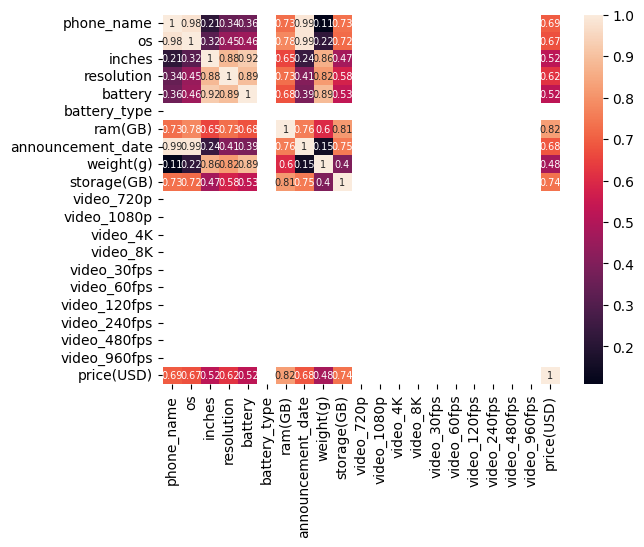

In [15]:
corr = treated_apple_devices.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 7})

In [16]:
treated_apple_devices.drop(columns=["battery_type"], inplace=True)
treated_apple_devices = treated_apple_devices[treated_apple_devices.columns.drop(list(treated_apple_devices.filter(regex='video')))]
treated_apple_devices.head()

,phone_name,os,inches,resolution,battery,ram(GB),announcement_date,weight(g),storage(GB),price(USD)
62,0,0,4.7,0,1821,2,0,148.0,64,210.0
63,1,1,5.8,3,2716,3,0,174.0,64,280.0
201,2,2,6.5,6,3174,4,1,208.0,64,570.0
202,3,2,5.8,3,2658,4,1,177.0,64,380.0
203,4,2,6.1,1,2942,3,1,194.0,64,310.0


## Final Heatmap with correlation matrix

<Axes: >

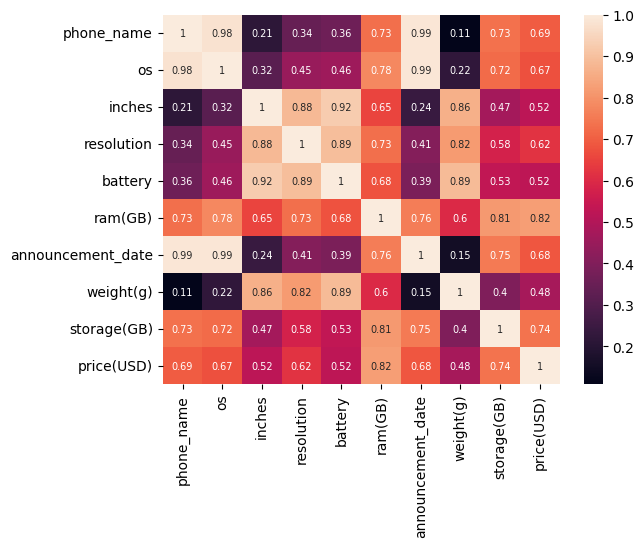

In [17]:
corr = treated_apple_devices.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 7})

## Trying to write a model to predict next iOS devices's price 

### Initializing variables and model object

In [18]:
X = treated_apple_devices[['ram(GB)', 'storage(GB)', 'os']]
y = treated_apple_devices['price(USD)']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training model

In [19]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

### Printing values to analyze

In [20]:
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"X Test: {X_test}")
print(f"Y Test: {y_test}")
print(f"Y Predict: {y_pred}")

Mean Squared Error: 11979.108226981942
Coefficients: [192.7788997    2.06945412   9.99677395]
Intercept: -408.25150074850274
X Test:      ram(GB)  storage(GB)  os
62         2           64   0
947        6          128   5
536        3           64   3
63         3           64   1
949        4          128   5
Y Test: 62     210.00
947    897.62
536    189.50
63     280.00
949    648.00
Name: price(USD), dtype: float64
Y Predict: [ 109.75136228 1063.29589446  332.52058383  312.52703593  677.73809506]


## Conclusions